In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
athletes = pd.read_csv('2025_Problem_C_Data/summerOly_athletes.csv')
athletes

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


# 1.东道主分析

In [44]:
hosts = pd.read_csv('2025_Problem_C_Data/summerOly_hosts.csv')
hosts

,Year,Host,NOC
0,1896,"Athens, Greece",GRE
1,1900,"Paris, France",FRA
2,1904,"St. Louis, United States",USA
3,1908,"London, United Kingdom",GRB
4,1912,"Stockholm, Sweden",SWE
5,1916,Cancelled (WWI – Berlin had been awarded),NaN
6,1920,"Antwerp, Belgium",BEL
7,1924,"Paris, France",FRA
8,1928,"Amsterdam, Netherlands",NED
9,1932,"Los Angeles, United States",USA


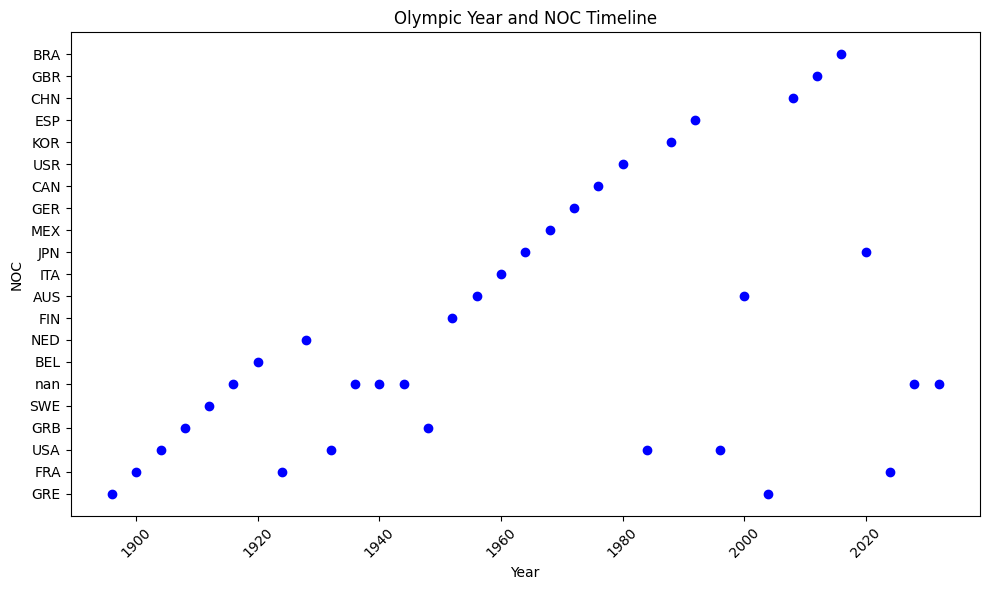

In [48]:
plt.figure(figsize=(10, 6))

# Plot the data as a scatter plot (no connecting lines)
plt.scatter(hosts['Year'], hosts['NOC'], color='b', marker='o')

# Set plot title and labels
plt.title('Olympic Year and NOC Timeline')
plt.xlabel('Year')
plt.ylabel('NOC')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [5]:
medal_counts = pd.read_csv('2025_Problem_C_Data/summerOly_medal_counts.csv')
medal_counts

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


In [10]:
programs = pd.read_csv('2025_Problem_C_Data/summerOly_programs.csv')
programs

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4.0,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31.0,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257.0,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34.0,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


# 2.人数统计和预测

## 2.1纯统计

<Figure size 1000x600 with 0 Axes>

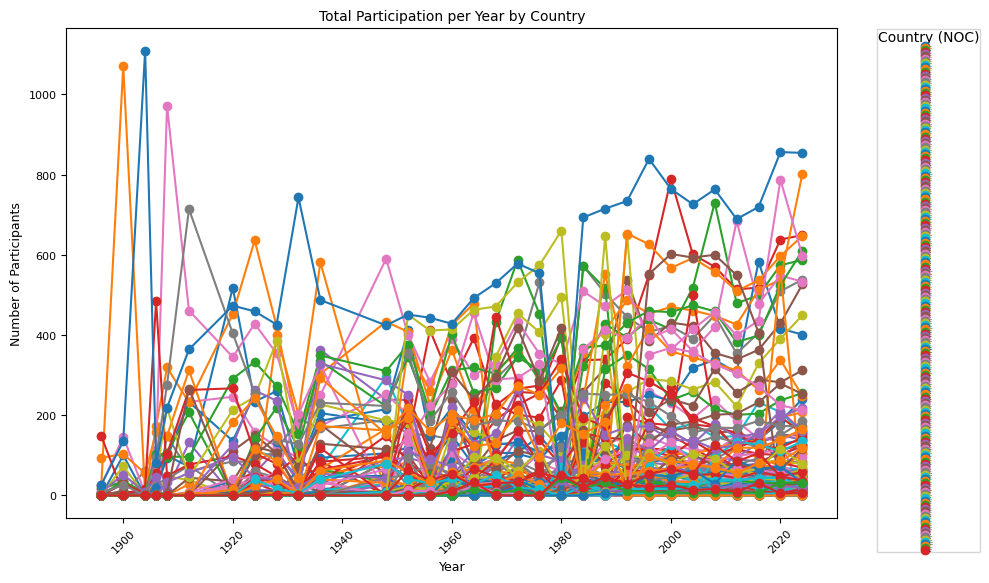

In [56]:
import matplotlib.pyplot as plt

# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=1.3, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


# 2.2 数据清洗
- 去除Year中后三项全为0的列
- 删除东道主点
- 删除离群点，阈值为100
- 线性插值填充NAN

In [98]:
# 按年份和国家（NOC）统计参赛人数
participation_by_year_country = athletes.groupby(['Year', 'NOC']).size().unstack(fill_value=0)

# 删除最后三行全为0的列
participation_by_year_country_q1_clean = participation_by_year_country.loc[:, participation_by_year_country.iloc[-3:].sum(axis=0) != 0]

# 遍历 hosts 表的每一行，获取 Year 和 NOC
for _, row in hosts.iterrows():
    year = row['Year']
    noc = row['NOC']
    
    # 如果该 Year 和 NOC 在 participation_by_year_country_q1_clean 中，设置为 NaN
    if year in participation_by_year_country_q1_clean.index and noc in participation_by_year_country_q1_clean.columns:
        participation_by_year_country_q1_clean.at[year, noc] = None  # 设置为 NaN

# 设置一个阈值，假设阈值为某个差异的倍数，可以根据数据调整
threshold = 100

# 对每个国家的参赛人数进行遍历，计算相邻年份之间的差异
for country in participation_by_year_country_q1_clean.columns:
    for year in range(1, len(participation_by_year_country_q1_clean)):
        # 计算当前年份和上一年份之间的差异
        previous_value = participation_by_year_country_q1_clean.loc[participation_by_year_country_q1_clean.index[year - 1], country]
        current_value = participation_by_year_country_q1_clean.loc[participation_by_year_country_q1_clean.index[year], country]
        
        difference = abs(current_value - previous_value)
        
        # 如果差异大于阈值，认为是坏点
        if difference > threshold:
            participation_by_year_country_q1_clean.loc[participation_by_year_country_q1_clean.index[year], country] = None  # 设置为 NaN

# 对坏点（NaN）进行线性插值填充
participation_by_year_country_q1_clean = participation_by_year_country_q1_clean.interpolate(method='linear', axis=0)



<Figure size 1000x600 with 0 Axes>

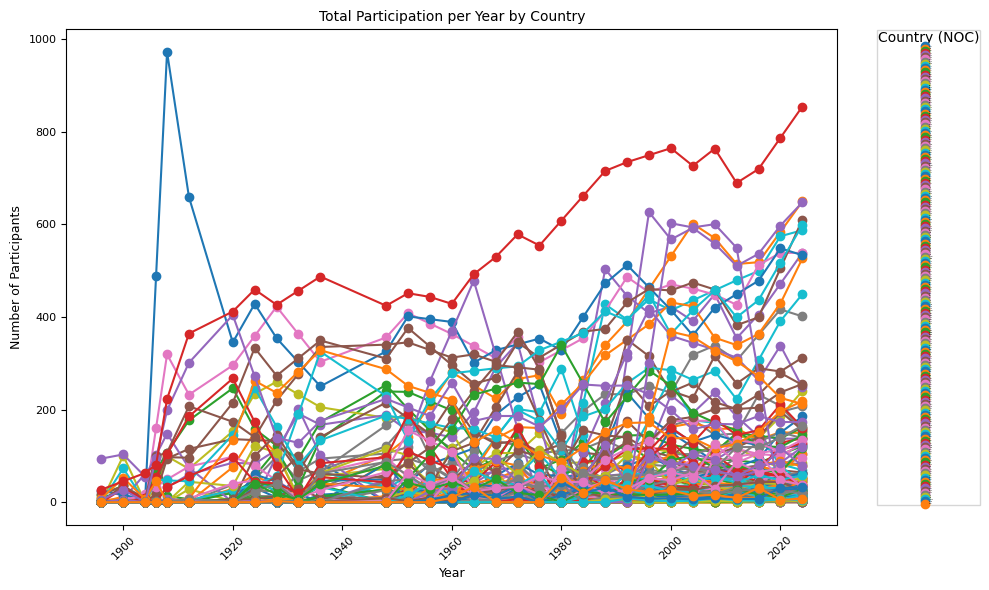

In [99]:
# 绘制折线图
plt.figure(figsize=(10, 6))
participation_by_year_country_q1_clean.plot(kind='line', marker='o', figsize=(10, 6))

# 设置标题、标签和图例的字体大小
plt.title('Total Participation per Year by Country', fontsize=10)  # 设置标题字体大小
plt.xlabel('Year', fontsize=9)  # 设置 x 轴标签字体大小
plt.ylabel('Number of Participants', fontsize=9)  # 设置 y 轴标签字体大小
plt.xticks(rotation=45, fontsize=8)  # 设置 x 轴刻度字体大小
plt.yticks(fontsize=8)  # 设置 y 轴刻度字体大小

# 设置图例的字体大小
plt.legend(title='Country (NOC)', fontsize=1.3, title_fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

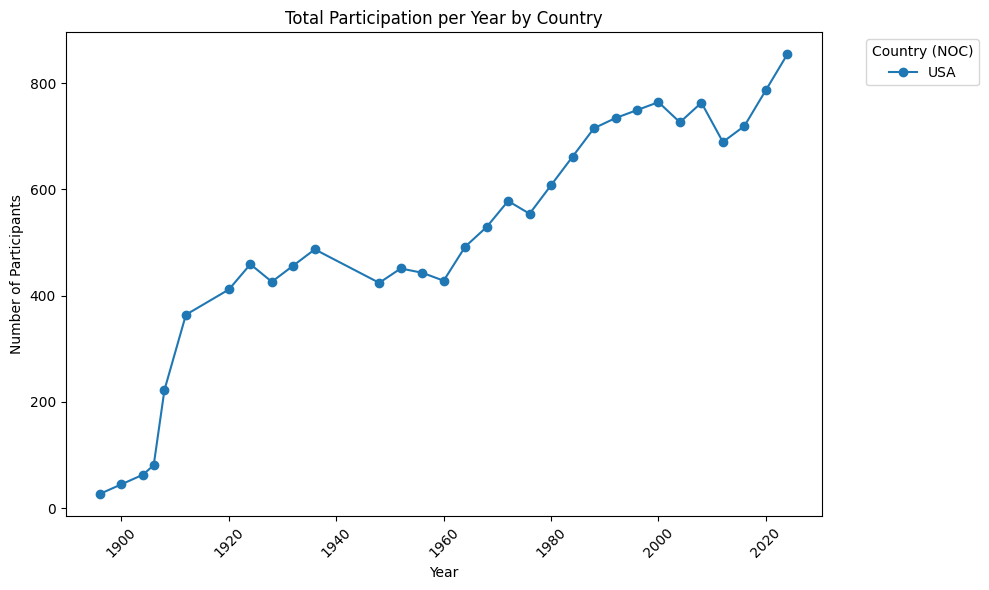

In [110]:
plt.figure(figsize=(10, 6))
participation_by_year_country_q1_clean['USA'].plot(kind='line', marker='o', figsize=(10, 6))

plt.title('Total Participation per Year by Country')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Country (NOC)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2.3 删除0奖牌
- 第一题只关注得奖的回归，所以清洗掉所有没得奖过的国家参赛人数